<a href="https://colab.research.google.com/github/ED19841002/testrepo/blob/main/Used_Laptop_sales_GenAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats

In [3]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(URL)

In [4]:
df.head()

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


In [5]:
df.describe()

,Unnamed: 0.1,Unnamed: 0,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000
mean,118.500000,118.500000,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,0.676471,0.323529
std,68.848868,68.848868,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,0.468809,0.468809
min,0.000000,0.000000,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,0.000000,0.000000
25%,59.250000,59.250000,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,0.000000,0.000000
50%,118.500000,118.500000,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,1.000000,0.000000
75%,177.750000,177.750000,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,1.000000,1.000000
max,237.000000,237.000000,5.000000,3.000000,2.000000,7.000000,17.300000,1.000000,16.000000,256.000000,7.938000,3810.000000,1.000000,1.000000


In [6]:
df.describe(include='all')

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
count,238.000000,238.000000,238,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238.000000,238,238.000000,238.000000
unique,NaN,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN
top,NaN,NaN,Dell,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Low,NaN,NaN
freq,NaN,NaN,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,160,NaN,NaN
mean,118.500000,118.500000,NaN,3.205882,2.151261,1.058824,5.630252,14.688655,0.813822,7.882353,245.781513,4.106221,1462.344538,NaN,0.676471,0.323529
std,68.848868,68.848868,NaN,0.776533,0.638282,0.235790,1.241787,1.166045,0.141860,2.482603,34.765316,1.078442,574.607699,NaN,0.468809,0.468809
min,0.000000,0.000000,NaN,1.000000,1.000000,1.000000,3.000000,12.000000,0.413793,4.000000,128.000000,1.786050,527.000000,NaN,0.000000,0.000000
25%,59.250000,59.250000,NaN,3.000000,2.000000,1.000000,5.000000,14.000000,0.689655,8.000000,256.000000,3.246863,1066.500000,NaN,0.000000,0.000000
50%,118.500000,118.500000,NaN,3.000000,2.000000,1.000000,5.000000,15.000000,0.862069,8.000000,256.000000,4.106221,1333.000000,NaN,1.000000,0.000000
75%,177.750000,177.750000,NaN,4.000000,3.000000,1.000000,7.000000,15.600000,0.931034,8.000000,256.000000,4.851000,1777.000000,NaN,1.000000,1.000000


In [8]:
df.isnull().sum()

,0
Unnamed: 0.1,0
Unnamed: 0,0
Manufacturer,0
Category,0
GPU,0
OS,0
CPU_core,0
Screen_Size_inch,0
CPU_frequency,0
RAM_GB,0


In [9]:
df.dtypes

,0
Unnamed: 0.1,int64
Unnamed: 0,int64
Manufacturer,object
Category,int64
GPU,int64
OS,int64
CPU_core,int64
Screen_Size_inch,float64
CPU_frequency,float64
RAM_GB,int64


The scatter-regression plot for CPU_frequency is:


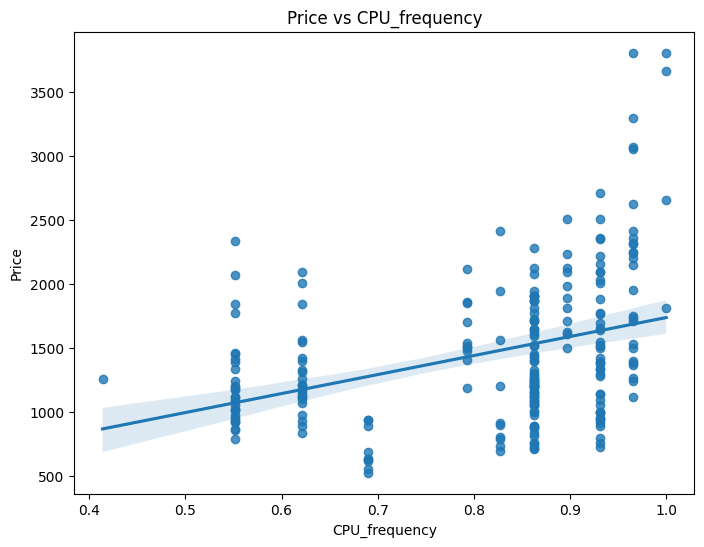

Correlation of Price and CPU_frequency is:
                CPU_frequency     Price
CPU_frequency       1.000000  0.366666
Price               0.366666  1.000000
For CPU_frequency the Pearson Correlation Coefficient is: 0.36666555892588604 with a P-value of P = 5.5024633507134225e-09
The scatter-regression plot for Screen_Size_inch is:


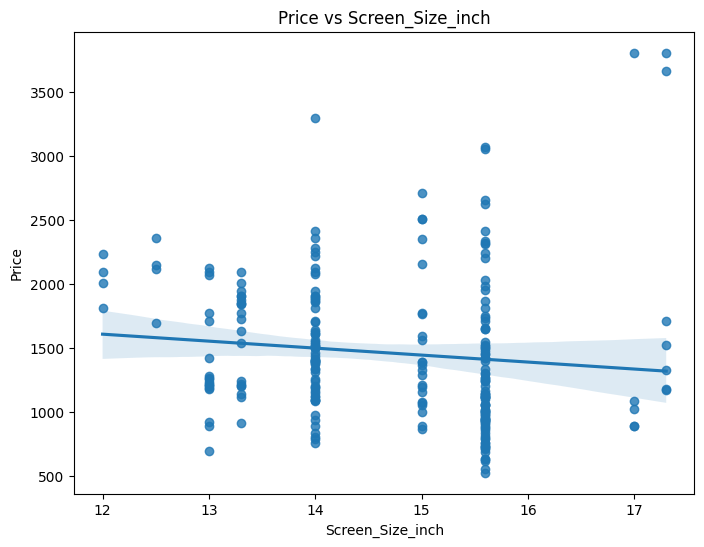

Correlation of Price and Screen_Size_inch is:
                   Screen_Size_inch     Price
Screen_Size_inch          1.000000 -0.110644
Price                    -0.110644  1.000000
For Screen_Size_inch the Pearson Correlation Coefficient is: -0.11064420817118266 with a P-value of P = 0.08853397846830766
The scatter-regression plot for Weight_pounds is:


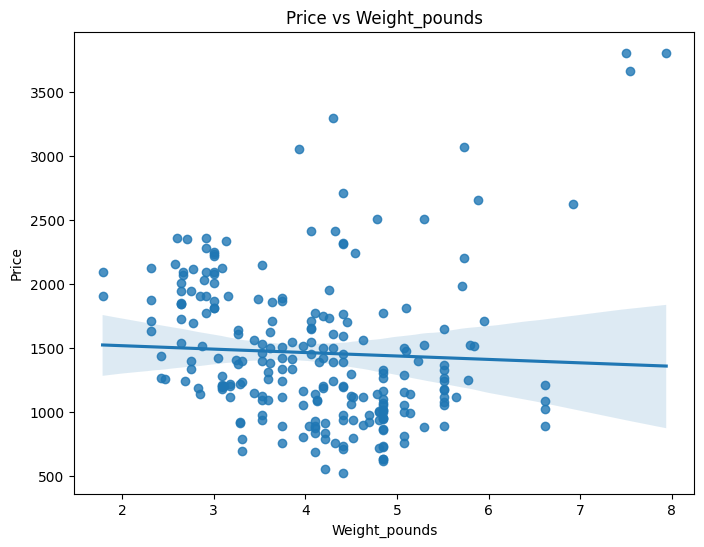

Correlation of Price and Weight_pounds is:
                Weight_pounds     Price
Weight_pounds       1.000000 -0.050312
Price              -0.050312  1.000000
For Weight_pounds the Pearson Correlation Coefficient is: -0.05031225837751549 with a P-value of P = 0.43976938534338944


In [19]:
for feature in ["CPU_frequency", "Screen_Size_inch","Weight_pounds"]:
  print(f"The scatter-regression plot for {feature} is:")
  plt.figure(figsize=(8, 6))
  sns.regplot(df, x=feature, y='Price')
  plt.title(f'Price vs {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Price')
  plt.show()
  print(f'Correlation of Price and {feature} is:\n {df[[feature, "Price"]].corr()}')
  pearson_coef, p_value = stats.pearsonr(df[feature], df['Price'])
  print(f'For {feature} the Pearson Correlation Coefficient is: {pearson_coef} with a P-value of P = {p_value}')

The boxplot for Category is:


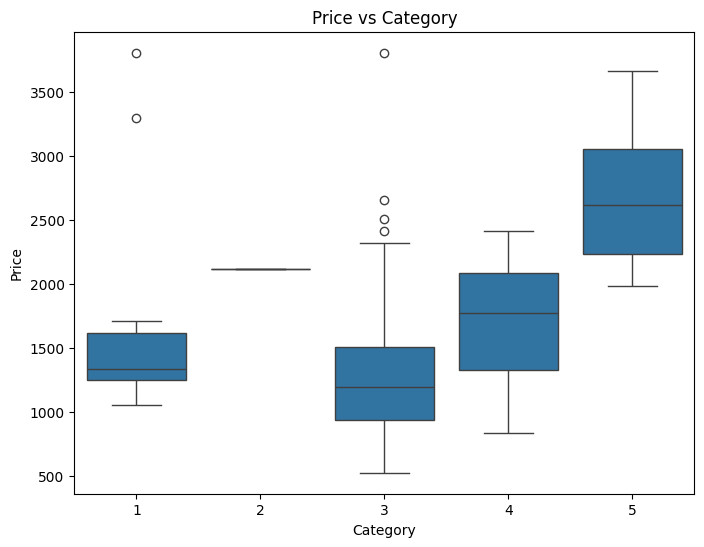

The boxplot for GPU is:


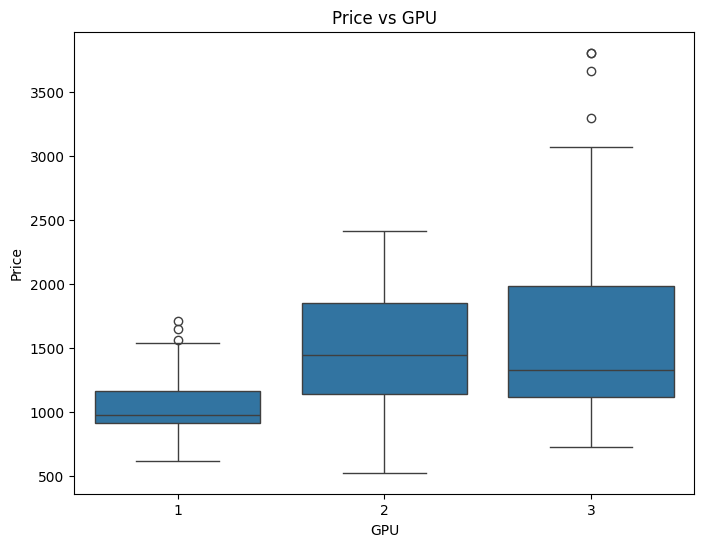

The boxplot for OS is:


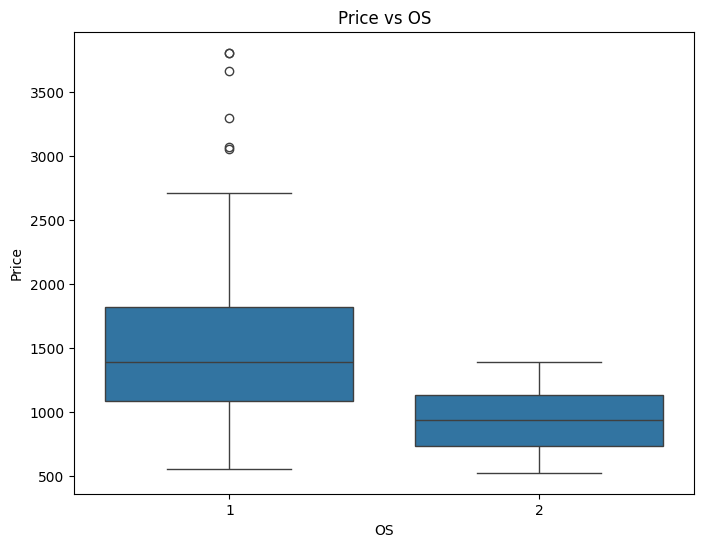

The boxplot for CPU_core is:


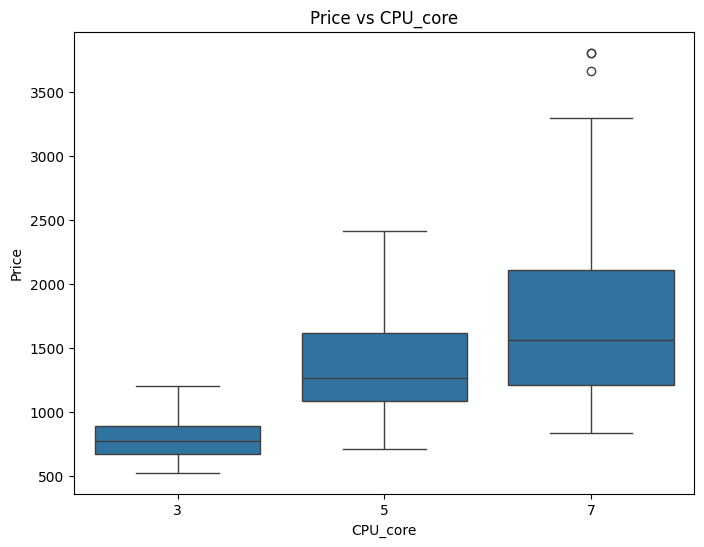

The boxplot for RAM_GB is:


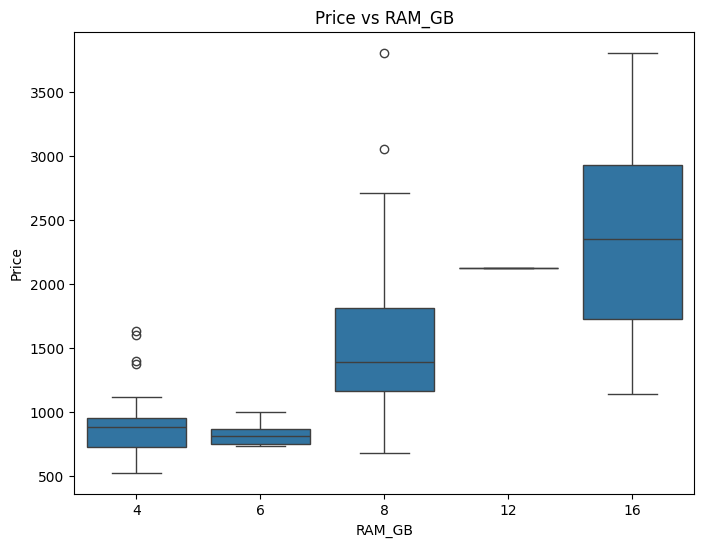

The boxplot for Storage_GB_SSD is:


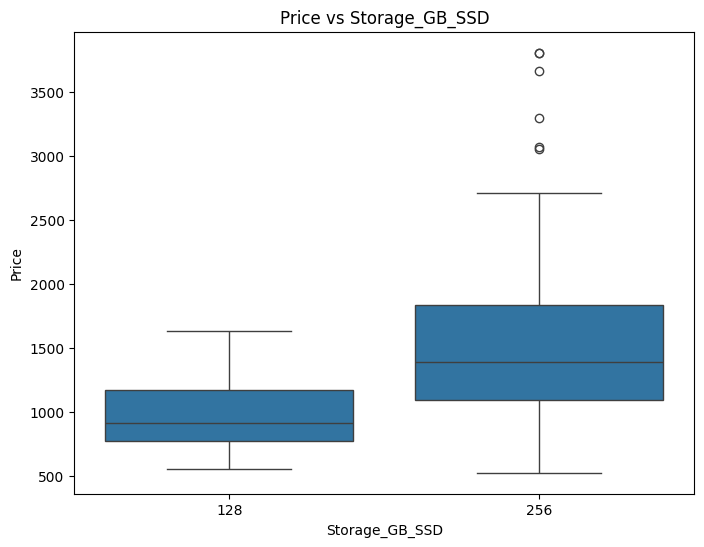

In [21]:
for feature in ['Category', 'GPU', 'OS', 'CPU_core', 'RAM_GB', 'Storage_GB_SSD']:
  print(f'The boxplot for {feature} is:')
  plt.figure(figsize=(8,6))
  sns.boxplot(df, x=feature, y="Price")
  plt.title(f'Price vs {feature}')
  plt.xlabel(f'{feature}')
  plt.ylabel('Price')
  plt.show()

In [30]:
# Select numerical attributes
numerical_attributes = df.select_dtypes(include=np.number)

# Calculate correlation values for all numerical attributes against 'Price'
correlation_values = numerical_attributes.corr()['Price'].drop('Price')

# Calculate Pearson coefficient and p-values for all numerical attributes against 'Price'
pearson_coefficients = []
p_values = []

for column in numerical_attributes.columns:
    if column != 'Price':
        pearson_coefficient, p_value = stats.pearsonr(numerical_attributes[column], df['Price'])
        pearson_coefficients.append(pearson_coefficient)
        p_values.append(p_value)

# Create a new dataframe to store the results
results_df = pd.DataFrame({'Correlation Value': correlation_values, 'Pearson Coefficient': pearson_coefficients, 'P-value': p_values})

# Print the results
print(results_df)

                  Correlation Value  Pearson Coefficient       P-value
Unnamed: 0.1               0.321933             0.321933  3.851058e-07
Unnamed: 0                 0.321933             0.321933  3.851058e-07
Category                   0.286243             0.286243  7.225696e-06
GPU                        0.288298             0.288298  6.166950e-06
OS                        -0.221730            -0.221730  5.696643e-04
CPU_core                   0.459398             0.459398  7.912950e-14
Screen_Size_inch          -0.110644            -0.110644  8.853398e-02
CPU_frequency              0.366666             0.366666  5.502463e-09
RAM_GB                     0.549297             0.549297  3.681561e-20
Storage_GB_SSD             0.243421             0.243421  1.489892e-04
Weight_pounds             -0.050312            -0.050312  4.397694e-01
Screen-Full_HD            -0.021075            -0.021075  7.463568e-01
Screen-IPS_panel           0.021075             0.021075  7.463568e-01


In [31]:
df_gptest = df[["GPU", "CPU_core", "Price"]]
grouped_test1 = df_gptest.groupby(["GPU", "CPU_core"], as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [32]:
grouped_pivot = grouped_test1.pivot(index='GPU', columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


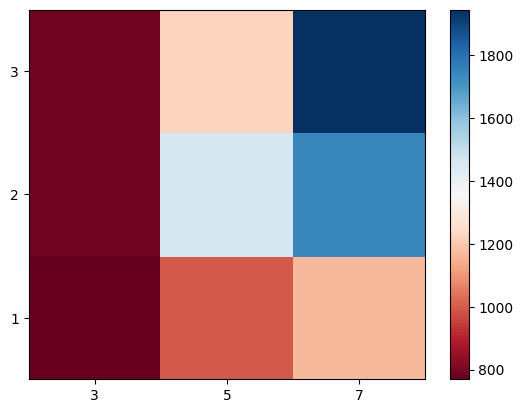

In [37]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#insert colorbar
fig.colorbar(im)